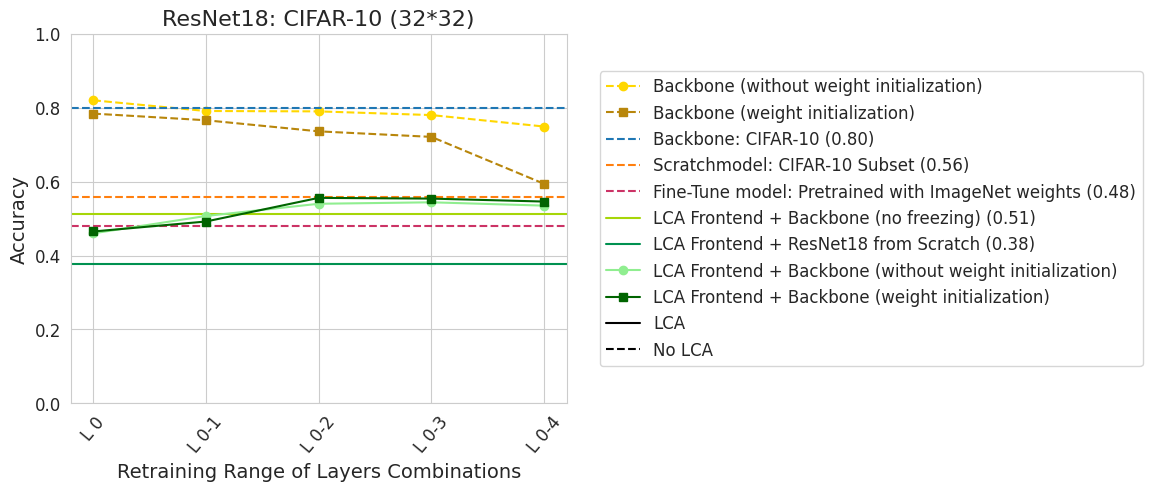

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

def plot_accuracies(file_path, label, color, linestyle='-', marker='o'):
    accuracies = {}
    with open(file_path, 'r') as file:
        data = file.readlines()
    for line in data:
        layer, accuracy = line.strip().split(',')
        accuracies[layer] = float(accuracy)
    layers = list(accuracies.keys())
    accuracies = list(accuracies.values())
    plt.plot(layers, accuracies, linestyle=linestyle, marker=marker, color=color, label=label)

c1 = '#FFD700'  # Coral
c2 = '#B8860B'  # Cerulean

# Plot accuracies from the first file
plot_accuracies('noLCA_unfreezing.txt', 'Backbone (without weight initialization)', c1, linestyle='--', marker='o')

# Plot accuracies from the second file
plot_accuracies('noLCA_unfreezing_resetting.txt', 'Backbone (weight initialization)', c2, linestyle='--', marker='s')

# Define different shades of green
light_green = '#90EE90'  # Light green
dark_green = '#006400'   # Dark green

# Define custom colors blue, orange, green, spanish green, red
non_lca_colors = ['#1f77b4', '#ff7f0e', '#cc3366', '#a6d608', '#009150']

# Add baseline accuracies
baseline_accuracies = {
    'Backbone: CIFAR-10' : 0.8000,
    'Scratchmodel: CIFAR-10 Subset': 0.5570,    
    'Fine-Tune model: Pretrained with ImageNet weights': 0.4800,
    'LCA Frontend + Backbone (no freezing)': 0.5130,
    'LCA Frontend + ResNet18 from Scratch': 0.3780,       
}

colors = non_lca_colors 
for (label, accuracy), color in zip(baseline_accuracies.items(), colors):
    linestyle = '-' if 'LCA' in label else '--'
    plt.axhline(y=accuracy, linestyle=linestyle, label=f'{label} ({accuracy:.2f})', color=color)

# Plot accuracies from the first file
plot_accuracies('overall_accuracies_unfreezing.txt', 'LCA Frontend + Backbone (without weight initialization)', light_green, linestyle='-', marker='o')

# Plot accuracies from the second file
plot_accuracies('overall_accuracies_unfreezing_resetting.txt', 'LCA Frontend + Backbone (weight initialization)', dark_green, linestyle='-', marker='s')

# Create the first legend for the existing handles and labels
existing_handles, existing_labels = plt.gca().get_legend_handles_labels()
plt.legend(existing_handles, existing_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

# Manually create the additional legend element
NoLCA_legend = plt.Line2D([], [], color='black', linestyle='-', marker='')
LCA_legend = plt.Line2D([], [], color='black', linestyle='--', marker='')

# Add the new legend element to the existing legend
existing_handles, existing_labels = plt.gca().get_legend_handles_labels()
plt.legend(existing_handles + [NoLCA_legend, LCA_legend], existing_labels + ['LCA', 'No LCA'], bbox_to_anchor=(1.05, 0.5), loc='center left')

# Set labels and title
plt.xlabel('Retraining Range of Layers Combinations')
plt.ylabel('Accuracy')
plt.title('ResNet18: CIFAR-10 (32*32)')

# Set y-axis limit
plt.ylim(0, 1)

# Rotate x-axis labels
plt.xticks(rotation=50)

# Customize font sizes
plt.rc('font', size=12)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Show plot
plt.show()
